In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
df = pd.read_csv('../data/IMDB Dataset.csv')

In [3]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
df.loc[df.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
...,...,...
49912,This is an incredible piece of drama and power...,positive
49950,This was a very brief episode that appeared in...,negative
49984,Hello it is I Derrick Cannon and I welcome you...,negative
49986,This movie is a disgrace to the Major League F...,negative


In [6]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

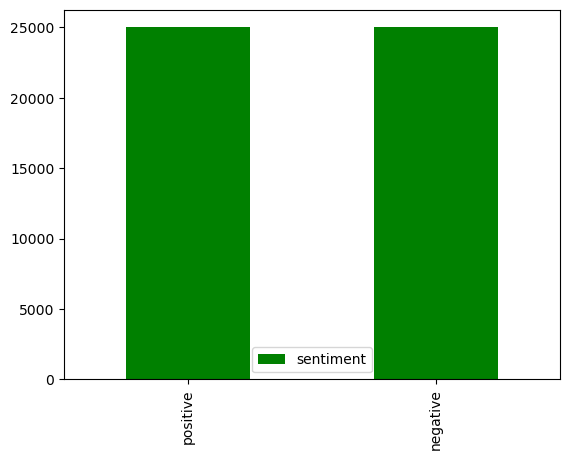

In [7]:
# Value count before dropping duplicate values
df['sentiment'].value_counts().plot(kind='bar',color='green')
plt.legend(loc='best')
plt.show()

In [8]:
# Summary of the dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [9]:
# To check the datatypes of the columns present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [10]:
df.drop_duplicates(subset='review',inplace=True)

tot_rows=len(df)
print("Total rows after deleting duplicate rows are :",tot_rows)

Total rows after deleting duplicate rows are : 49582


In [11]:
df.reset_index(drop=True)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49577,I thought this movie did a down right good job...,positive
49578,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49579,I am a Catholic taught in parochial elementary...,negative
49580,I'm going to have to disagree with the previou...,negative


In [12]:
df.shape

(49582, 2)

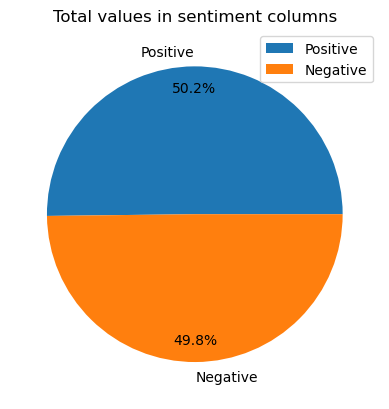

In [13]:
# Value count after dropping duplicate values
colors = ['#FF0000', '#0000FF']
count=df['sentiment'].value_counts()
plt.pie(count, labels=["Positive","Negative"],
        autopct='%1.1f%%', pctdistance=0.85)
plt.title("Total values in sentiment columns")
plt.legend()
plt.show()

In [14]:
# Value count after dropping duplicate values
df.sentiment.value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

In [15]:
# Convert the positive and negative value in form of 0s and 1s
# Here 0 represents negative value and 1 represents positive value
le = LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])
df.sentiment.value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

In [16]:
#Removing HTML Tags
def remove_html_tags(text):
    re_html = re.sub(r'<[^>]+>','',text)
    return re_html

print(f"Before removing HTML tags: {df['review'][1][:200]}")

df['review'] = df['review'].apply(remove_html_tags)

print(f"After removing HTML tags : {df['review'][1][:200]}")

Before removing HTML tags: A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece
After removing HTML tags : A wonderful little production. The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. The actors


In [17]:
#Lowercasting 
def convert_lowercase(column):
    column = column.str.lower()
    return column

print(f"Before applying lower casting: {df['review'][0][:10]}")

df['review'] = convert_lowercase(df['review'])

print(f"After applying lower casting : {df['review'][0][:10]}")

Before applying lower casting: One of the
After applying lower casting : one of the


In [18]:
contraction_dict = {"ain't": "is not", "aren't": "are not","cuz": "because","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}
def _get_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))
    return contraction_dict, contraction_re

def replace_contractions(text):
    contractions, contractions_re = _get_contractions(contraction_dict)
    def replace(match):
        return contractions[match.group(0)]
    return contractions_re.sub(replace, text)

print(f"Review before contractions : {df['review'][0]}")

df['review'] = df['review'].apply(replace_contractions)

print(f"Review after contractions : {df['review'][0]}")

Review before contractions : one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that 

In [19]:
# Removing Stopwords
stopwords_english = stopwords.words('english')

def remove_stopwords(text):
    stop_words = nltk.corpus.stopwords.words("english")
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    return text

print(f"Review before removing stop words : {df['review'][0]}")

df['review'] = df['review'].apply(remove_stopwords)

print(f"Review after removing stop words : {df['review'][0]}")

Review before removing stop words : one of the other reviewers has mentioned that after watching just 1 oz episode you will be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the f

In [20]:
#Removing special characters

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column

print(f"After removing special characters : {df['review'][0][:200]}")

df['review']=df['review'].apply(remove_special_characters)

print(f"After removing special characters : {df['review'][0][:200]}")

After removing special characters : one reviewers mentioned watching 1 oz episode hooked. right, exactly happened me.the first thing struck oz brutality unflinching scenes violence, set right word go. trust me, show faint hearted timid.
After removing special characters : one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show p


In [21]:
lem = WordNetLemmatizer()
def perform_lemmatizer(text):
    new_text = [lem.lemmatize(word) for word in text.split()]
    return ' '.join(new_text)

print(f"Review before removing Lemmatizing : {df['review'][0]}")

df['review'] = df['review'].apply(perform_lemmatizer)

print(f"Review after removing Lemmatizing : {df['review'][0]}")

Review before removing Lemmatizing : one reviewers mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust me show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz mess around first episode ever saw struck nasty surreal could say ready it watched more developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away it 

In [22]:
# def tokenize_words(text):
#     text = word_tokenize(text)
    
#     return text
# print(f"Review before tokenizing words : {df['review'][0]}")

# df['review'] = df['review'].apply(tokenize_words)

# print(f"Review after tokenizing words : {df['review'][0]}")

In [23]:
df = df.reset_index(drop=True)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
def split_data(df):
    global x,y
    x = df.drop(columns=["sentiment"],axis=1)
    y = df["sentiment"]
    vect = CountVectorizer()
    x = vect.fit_transform(df['review'])
    return x,y

df1 = split_data(df)

In [26]:
def trainTestSplit():
    global X_train,X_test,y_train,y_test
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
    return X_train,X_test,y_train,y_test

df2 = trainTestSplit()
df2

(<39665x209210 sparse matrix of type '<class 'numpy.int64'>'
 	with 3920176 stored elements in Compressed Sparse Row format>,
 <9917x209210 sparse matrix of type '<class 'numpy.int64'>'
 	with 978603 stored elements in Compressed Sparse Row format>,
 7827     0
 4811     0
 35252    1
 3446     0
 24377    0
         ..
 11284    0
 44732    0
 38158    0
 860      1
 15795    1
 Name: sentiment, Length: 39665, dtype: int32,
 29035    0
 43282    1
 38461    0
 16000    0
 5245     1
         ..
 2923     1
 15253    0
 17792    0
 37836    0
 2691     0
 Name: sentiment, Length: 9917, dtype: int32)

In [27]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [28]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4939
           1       0.85      0.85      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



In [29]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix \n",cm)

Confusion Matrix 
 [[4167  772]
 [ 728 4250]]


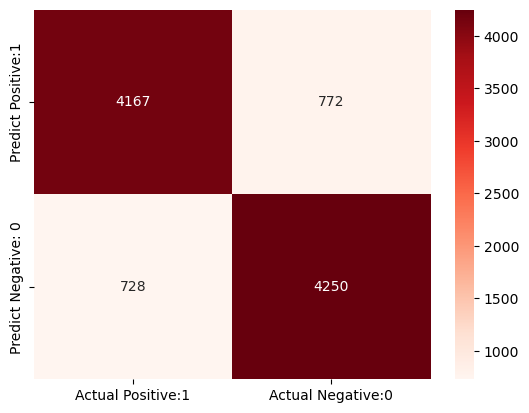

In [30]:
cm_matrix=pd.DataFrame(data=cm, columns=['Actual Positive:1','Actual Negative:0'],index=['Predict Positive:1','Predict Negative: 0'])
sns.heatmap(cm_matrix,cmap='Reds',annot=True,fmt="d")
plt.show()

In [31]:
rf = pickle.dump(clf,open('../models/movie_review.pkl','wb'))

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      4939
           1       0.71      0.71      0.71      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917



In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression(random_state=100,verbose=20,max_iter=10)
lr.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\parim\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


LogisticRegression(max_iter=10, random_state=100, verbose=20)

In [36]:
lr.score(X_test,y_test)

0.8703236865987698

In [37]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4939
           1       0.87      0.88      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917



In [38]:
lr = pickle.dump(lr,open('../models/logistic_regression_model.pkl','wb'))

In [39]:
cm1 = confusion_matrix(y_test,y_pred)

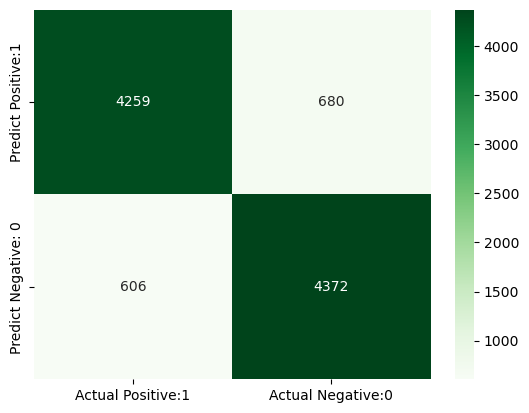

In [40]:
cm_matrix=pd.DataFrame(data=cm1, columns=['Actual Positive:1','Actual Negative:0'],index=['Predict Positive:1','Predict Negative: 0'])
sns.heatmap(cm_matrix,cmap='Greens',annot=True,fmt="d")
plt.show()